# Diabetes Prediction

## Diabetes:

#### Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

### About this project :-

 -  The objective of this project is to classify whether someone has diabetes or not.
 - Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
 - The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
 - The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

### About the Dataset:-

 - Pregnancies :- Number of times a woman has been pregnant
 - Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
 - BloodPressure :- Diastollic Blood Pressure (mm hg)
 - SkinThickness :- Triceps skin fold thickness(mm)
 - Insulin :- 2 hour serum insulin(mu U/ml)
 - BMI :- Body Mass Index ((weight in kg/height in m)^2)
 - Age :- Age(years)
 - DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
 - Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
raw_df = pd.read_csv('diabetes.csv', encoding='unicode_escape')

### Exploratory Data Analysis

In [3]:
raw_df.head()#get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
raw_df.duplicated().sum()#It shows the duplicate data

0

In [5]:
raw_df.isnull().sum()#It displays the count of the null values

 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
 BMI                          0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [6]:
raw_df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
raw_df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [8]:
raw_df.info()# Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype
            # and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

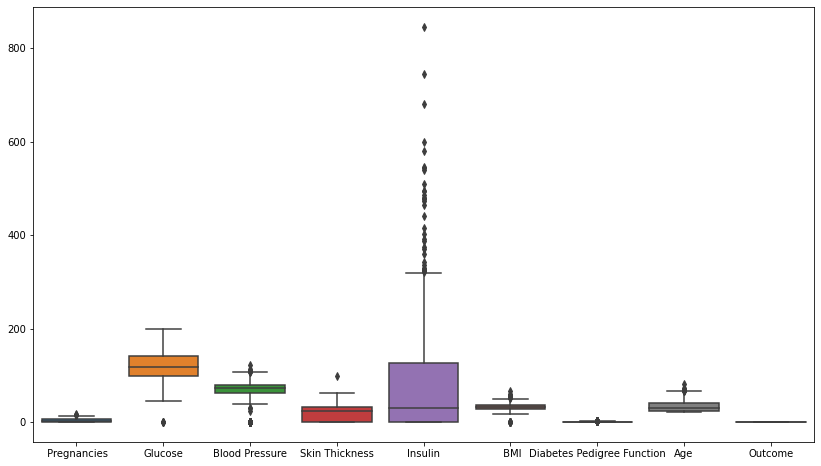

In [9]:
#This box plot shows how the data is distributed , along with outliers
plt.figure(figsize=(14,8))
sns.boxplot(data = raw_df)

## Observation:
 - All the columns have few Outliers. 
 - Insulin Column has extreme Outliers.

In [10]:
# pip install autoviz --no-cache-dir --ignore-installed

In [11]:
# from autoviz.AutoViz_Class import AutoViz_Class

In [12]:
# AV = AutoViz_Class()
# dfte = AV.AutoViz(filename='', sep=',', depVar='', dfte=raw_df, header=0, verbose=0, lowess=False,
#     chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
# plt.tight_layout()

 - AutoViz library let's us know the Visualization Automatically.

### Feature Selection

**Spearman's Rank correlation coefficient** is a technique which can be used to summarise the strength and direction (negative or positive) of a relationship between two variables.The result will always be between 1 and minus 1.

<AxesSubplot:>

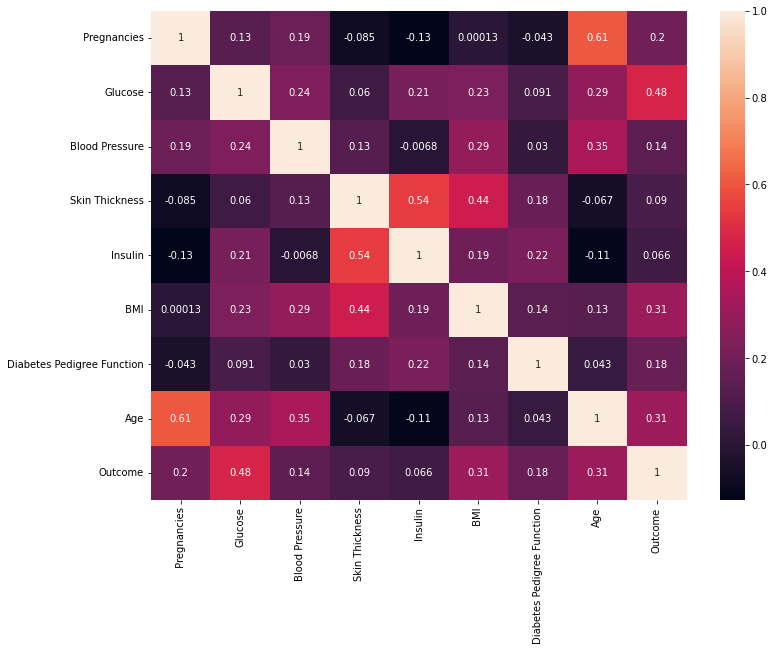

In [13]:
plt.figure(figsize=(12,9))
corr = raw_df.corr(method='spearman')
sns.heatmap(corr,annot=True)

### CONCLUSION :- 
 - Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated.

In [14]:
raw_df.columns #learning about the columns

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [15]:
raw_df.rename(columns={' Pregnancies':'Pregnancies', ' BMI':'BMI'}, inplace=True)#Renaming the column names

In [16]:
raw_df.columns #learning about the columns

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

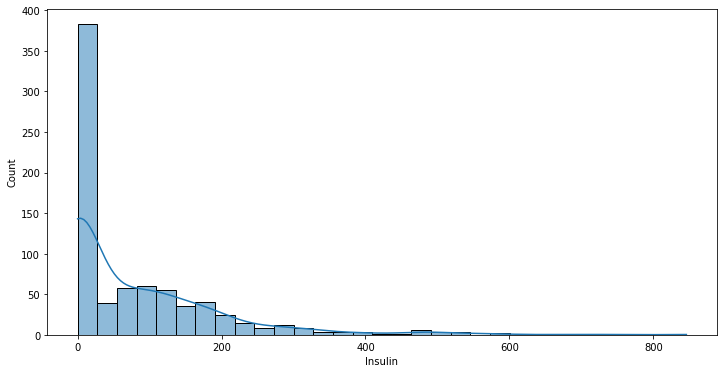

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=raw_df,x='Insulin',kde=True)#plot shows how the distribution of Insulin column is done

### Handling Outliers

    An outlier is a data point in a data set that is distant from all other observations.

### Using IQR 

In [18]:
def remove_outliers(col_name):
    outliers_index = []
    for j in col_name:
        q3 = raw_df[j].quantile(0.75)
        q1 = raw_df[j].quantile(0.25)
        IQR = q3-q1
        upper_whisker = q3 + (1.5*IQR)
        lower_whisker = q1 - (1.5*IQR)    
        
        out = raw_df[raw_df[j] > upper_whisker]
        out_index = out.index
        for i in out_index:
            if i not in outliers_index:
                outliers_index.append(i)
                
        out1 = raw_df[raw_df[j] < lower_whisker]
        out_index = out.index
        for i in out_index:
            if i not in outliers_index:
                outliers_index.append(i)
                
    return outliers_index

In [19]:
cols = raw_df.columns
cols

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [20]:
cols

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [21]:
x = remove_outliers(cols)
len(x)

87

## Observation

 -  Total 87 Outliers are there . So , we can remove the Outliers.

In [22]:
87/768 * 100#Total 11.32% outliers are there

11.328125

### Dropping the Outliers

In [23]:
df = raw_df.drop(labels=x)
df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

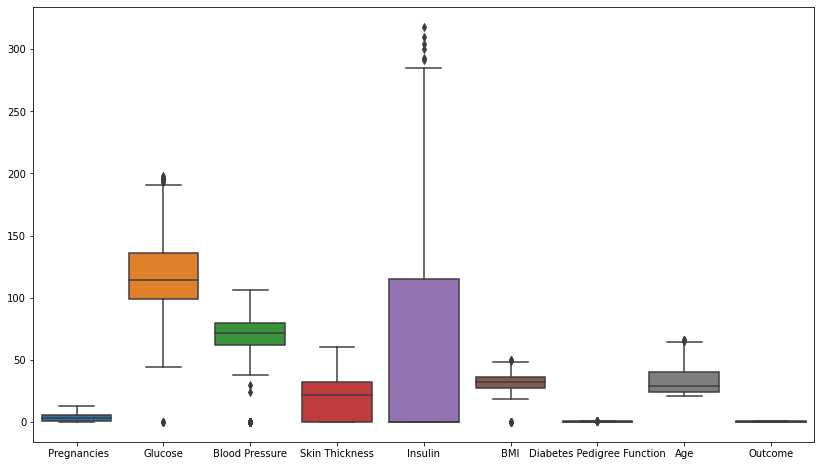

In [24]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df)

### Observaton:
 - After dropping most of the Outliers are removed.

In [25]:
df[df['Glucose'] == 0]#Filtered where Glucose is equal to zero

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [26]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['Blood Pressure'] = df['Blood Pressure'].replace(0,df['Blood Pressure'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
#Replacing zero with median value as median is not affected by Outliers

<AxesSubplot:>

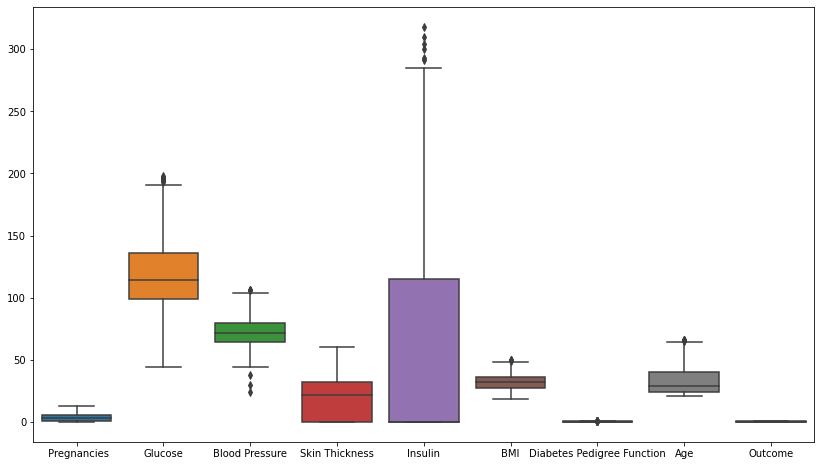

In [27]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df)

### Split the Data Frame into X and y

In [28]:
X = df.drop('Outcome',axis=1)#dropping the Outcome column and keeping all other columns as X
y = df['Outcome']#training data 

## Train Test Split

 - The train-test split is a technique for evaluating the performance of a machine learning algorithm.

 - Train Dataset: Used to fit the machine learning model.

 - Test Dataset: Used to evaluate the fit machine learning model.

 - Common split percentages include:

Train: 80%, Test: 20%

I've used 80% train and 20% test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Decision Tree Algorithm

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [31]:
dc = DecisionTreeClassifier(criterion="gini",max_depth=3, min_samples_leaf=2, random_state=101)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=101)

In [32]:
y_pred_dc = dc.predict(X_test)
y_pred_dc

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        97
           1       0.70      0.53      0.60        40

    accuracy                           0.80       137
   macro avg       0.76      0.72      0.73       137
weighted avg       0.79      0.80      0.79       137



In [34]:
print(accuracy_score(y_test,y_pred_dc))

0.7956204379562044


In [35]:
confusion_matrix(y_test,y_pred_dc)

array([[88,  9],
       [19, 21]], dtype=int64)

## Random Forest Algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=300, random_state=101, max_depth=5)
rc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=101)

In [37]:
y_pred_rc = rc.predict(X_test)
y_pred_rc

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred_rc))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        97
           1       0.59      0.68      0.63        40

    accuracy                           0.77       137
   macro avg       0.72      0.74      0.73       137
weighted avg       0.78      0.77      0.77       137



In [39]:
confusion_matrix(y_test,y_pred_rc)

array([[78, 19],
       [13, 27]], dtype=int64)

### Testing with Grid Search Cross Validation

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
y_test = np.array(y_test)
y_test = y_test.reshape((-1,1))

In [42]:
rc_model = RandomForestClassifier()
param_grid = {
    'max_depth': [2,3],
    'criterion':['gini'],
    'max_features':[0.1,0.2,0.7],
    'min_samples_leaf':[2,3,4],
    'min_samples_split':[2,3,5],
    'n_estimators':[100,200,300]
}
model_gridsearch = GridSearchCV(
estimator = rc_model,
param_grid = param_grid,
scoring='accuracy',
n_jobs = -1,
cv=4)
model_gridsearch.fit(y_test,y_pred_rc)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'max_features': [0.1, 0.2, 0.7],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [43]:
model_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [44]:
model_gridsearch.best_score_

0.7668067226890756

In [45]:
rc = RandomForestClassifier(criterion="gini", max_depth=2, random_state=101, n_estimators=500)
rc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=101)

In [46]:
y_pred_rc = rc.predict(X_test)
y_pred_rc

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred_rc))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        97
           1       0.61      0.47      0.54        40

    accuracy                           0.76       137
   macro avg       0.71      0.68      0.69       137
weighted avg       0.75      0.76      0.75       137



In [48]:
confusion_matrix(y_test,y_pred_rc)

array([[85, 12],
       [21, 19]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_rc)


0.7591240875912408

## Logistic Regression Algorithm

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression(max_iter=1000, penalty='l2')
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0], dtype=int64)

In [53]:
confusion_matrix(y_test,y_pred_lr)

array([[80, 17],
       [12, 28]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_lr)

0.7883211678832117

In [55]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        97
           1       0.62      0.70      0.66        40

    accuracy                           0.79       137
   macro avg       0.75      0.76      0.75       137
weighted avg       0.80      0.79      0.79       137

